# Laboratorio 1 de FAPRN: Perceptron simple
## Autor: Richard Anthony Torti Castillo


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import csv


## Parte 1: Implementación de un perceptrón simple genérico

### Función de activación

In [2]:
#Inputs:
#    rowData: List with inputs (BIAS, x_1, x_2, x_3, x_4)
#    weights: Weight associated to each input of rowData
#    threshold: if sum of each input * weight is greater than threshold then 1, 0 if not
def activation(rowData, weights, threshold):
    sum = 0
    for x,w in zip(rowData,weights):
        sum += x*w
    
    if sum > threshold:
        return 1
    return 0

##### La función retorna 1 si la sumatoria de las entradas multiplicadas con sus pesos es mayor al thresholder

### Función de ajuste de pesos

In [3]:
#Inputs:
#    data: Matrix with all inputs for each row
#    weights= weight of inputs
#    iterations: how much times the function run to get the weights adjusted (the more iterations the less error, if the problem converges)
def adjustWeight(data, weights, threshold, iterations):
    errors = []
    for i in range(iterations):
        errorIteration = 0
        for row in data:
            activate = activation(row[0:-1], weights, threshold)
            error = row[-1] - activate #Assuming classification in the last 
            errorIteration += abs(error)

            weights = [w + error*value for w,value in zip(weights, row)]
        errors.append(errorIteration)
        
    return weights, errors

##### Esta función 

## Parte 2: Probar las funciones implementadas con compuertas AND, OR y XOR; con 4 entradas

### Función lógica AND

In [4]:
# Inputs:
#    data: Matrix with variables, 
#    weights: weight of each variable
#    threshold: Discriminatory value

def logicalAND(data, weights, threshold, iterations):
    #Add logical AND output in last position
    data = [row + [np.prod(row[1:])]  for row in data]
    weights, errors = adjustWeight(data, weights, threshold, iterations)
    
    plt.plot(errors)
    plt.title("Error en compuerta AND segun iteraciones")
    plt.ylabel("Error")
    plt.xlabel("Iteracion")

### Función lógica OR

In [5]:
def logicalOR(data, weights, threshold, iterations):
    
    #Add logical OR output in last position
    data = [row + [1 if sum(row[1:])>0 else 0] for row in data]
    weights, errors = adjustWeight(data, weights, threshold, iterations)
    
    plt.plot(errors)
    plt.title("Error en la compuerta OR segun iteraciones")
    plt.ylabel("Error")
    plt.xlabel("Iteracion")

### Función lógica XOR

In [6]:
def logicalXOR(data, weights, threshold, iterations):
    
    #Add logical XOR output in last position
    data = [row + [0 if sum(row[1:])%2==0 else 1] for row in data]
    weights, errors = adjustWeight(data, weights, threshold, iterations)
    
    plt.plot(errors)
    plt.title("Error en la compuerta XOR segun iteraciones")
    plt.ylabel("Error")
    plt.xlabel("Iteracion")

### Comprobación y gráficos de error

#### Datos generales

In [7]:
#data: matrix of row with every combination of variables and result, adding BIAS
#      BIAS x_1 x_2 x_3 x_4
data = [[1,  0,  0,  0,  0],
        [1,  0,  0,  0,  1],
        [1,  0,  0,  1,  0],
        [1,  0,  0,  1,  1],
        [1,  0,  1,  0,  0],
        [1,  0,  1,  0,  1],
        [1,  0,  1,  1,  0],
        [1,  0,  1,  1,  1],
        [1,  1,  0,  0,  0],
        [1,  1,  0,  0,  1],
        [1,  1,  0,  1,  0],
        [1,  1,  0,  1,  1],
        [1,  1,  1,  0,  0],
        [1,  1,  1,  0,  1],
        [1,  1,  1,  1,  0],
        [1,  1,  1,  1,  1]]

random.seed(0)
# Weight with random values, to make the adjustWeight function change it's values
weights = [random.randint(1,9) for x in data[0]]
threshold = 0
iterations = 100

#### Compuerta lógica AND

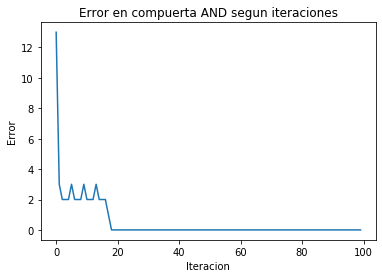

In [8]:
logicalAND(data, weights, threshold, iterations)

##### El grafico muestra que durante la primera iteración existieron más de 12 errores, por lo que de forma práctica significa que hubo aproximadamente 

#### Compuerta lógica OR

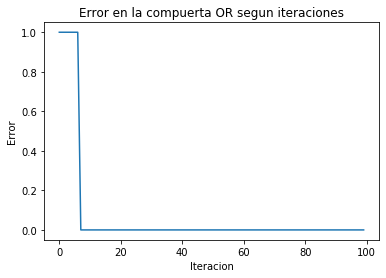

In [9]:
logicalOR(data, weights, threshold, iterations)

#### Compuerta lógica XOR

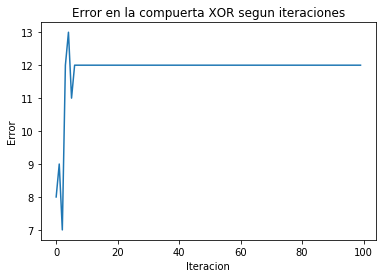

In [10]:
logicalXOR(data, weights, threshold, iterations)

## Parte 3: Probar perceptrón para el dataset letters.csv

In [11]:
def readData():
    data = []
    with open("/Users/kyogia/Desktop/APRN/Laboratorio1/letters.csv", "r") as file:
        reader = csv.reader(file)
        for row in reader:
            try:
                data.append([1, float(row[0]), float(row[1]), 1 if row[2]=="l" else 0])
            except:
                continue
    file.close()
    return data

In [12]:
letters = readData()


Text(0.5, 0, 'Iteración')

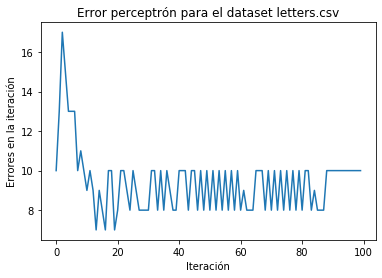

In [13]:
weights = [random.randint(1,10) for x in letters[0]]
weights, errors = adjustWeight(letters, weights, 50, 100)

plt.plot(errors)
plt.title("Error perceptrón para el dataset letters.csv")
plt.ylabel("Errores en la iteración")
plt.xlabel("Iteración")